In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from PIL import Image
# prepare object points
nx = 9#TODO: enter the number of inside corners in x
ny = 5#TODO: enter the number of inside corners in y

# Make a list of calibration images
images = glob.glob('camera_cal\calibration*.jpg')


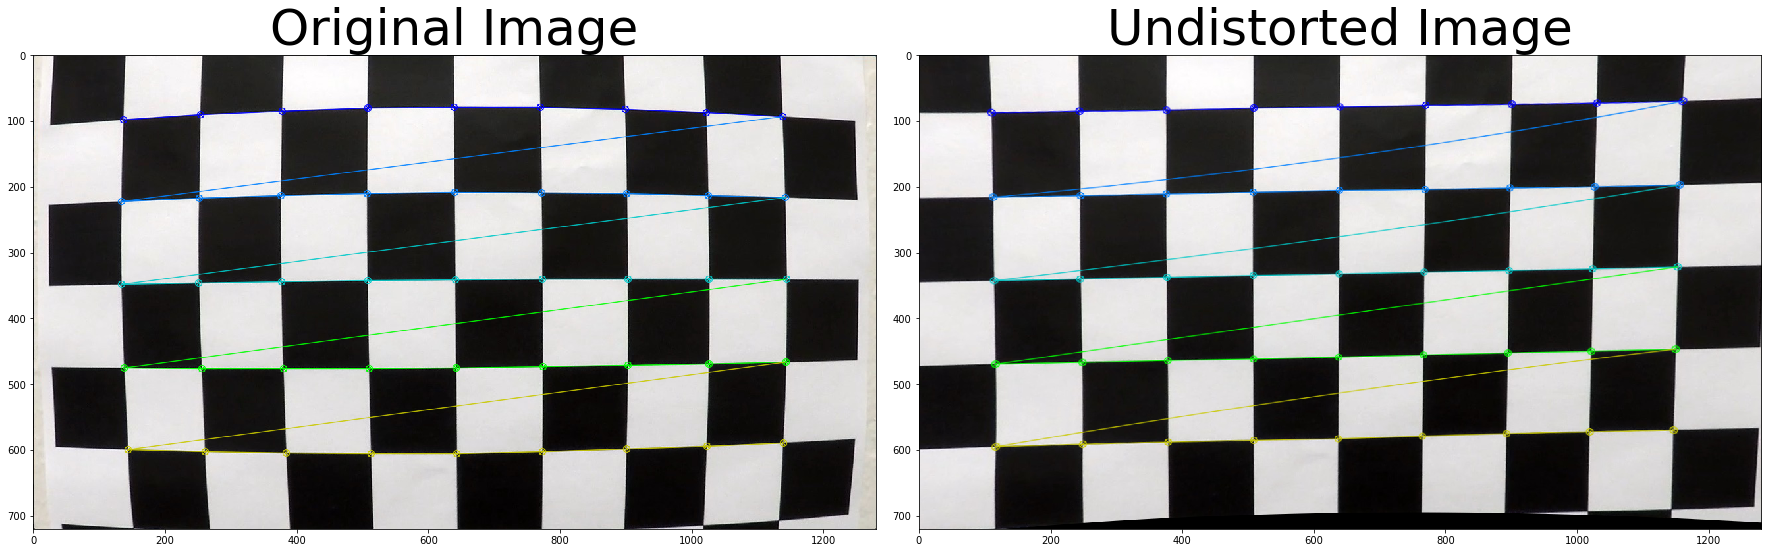

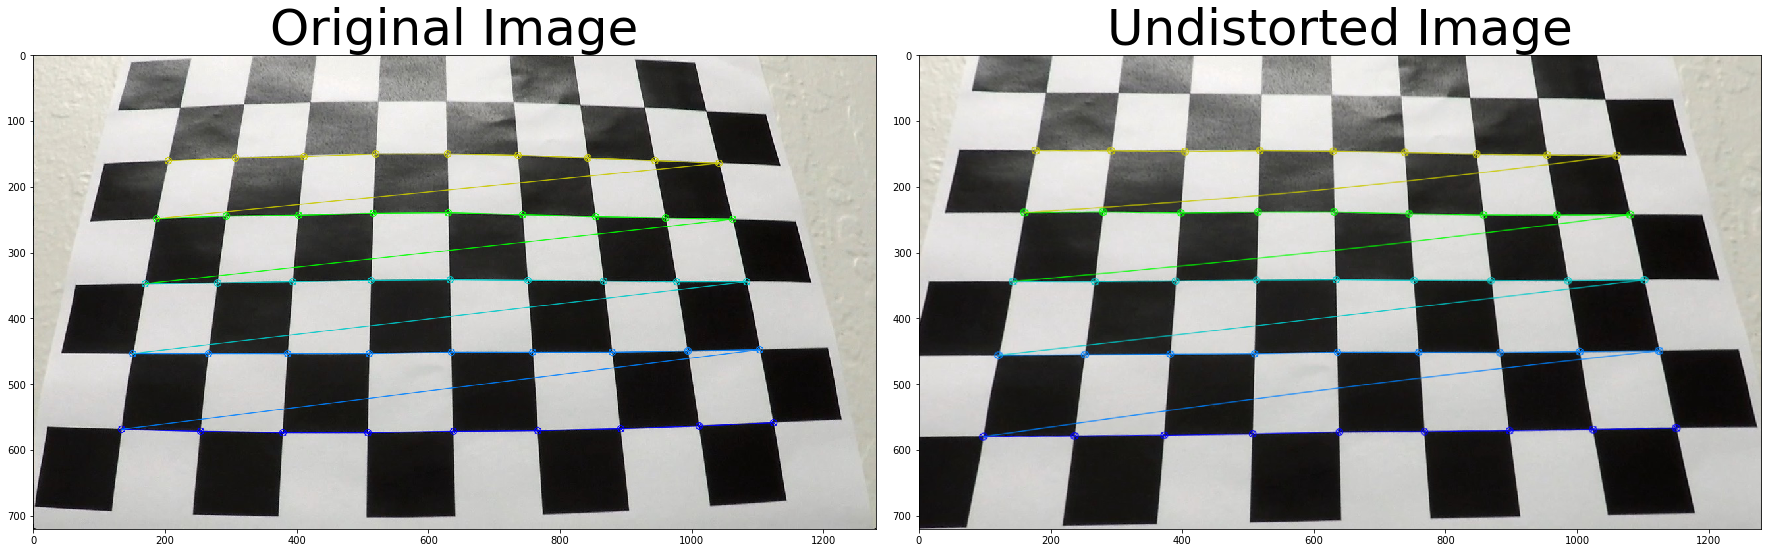

In [10]:
# Arrays to store object and image points from all the image
objpoints = [] # 3D points in real world space
imgpoints = [] #2D points in image plane

#Prepare object points ,like (0,0,0),(1,0,0)......,(10,4,....)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:5].T.reshape(-1,2)# x,y coordinates

# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

for fname in images:
    #read in each image
    img = mpimg.imread(fname)
    
    #undistorted = cal_undistort(img, objpoints, imgpoints)
    #Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    #find the chessboard corners
    
    ret , corners = cv2.findChessboardCorners(gray,(nx,ny),None)
    
    #if coners are found ,add object points,imag points
    
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        #draw and display the corners
        img = cv2.drawChessboardCorners(img,(nx,ny),corners,ret)
        undistorted = cal_undistort(img, objpoints, imgpoints)
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
        f.tight_layout()
        ax1.imshow(img)
        ax1.set_title('Original Image', fontsize=50)
        ax2.imshow(undistorted)
        ax2.set_title('Undistorted Image', fontsize=50)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
        im = Image.fromarray(img)
        filename = 'output_images/'+ fname
        newstr = filename.replace("camera_cal\\", "")
        im.save(newstr)
        im = Image.fromarray(undistorted)
        filename = 'output_images/_undistorted_'+ fname
        newstr = filename.replace("camera_cal\\", "")
        im.save(newstr)

